In [97]:
#without stemming

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [99]:
text1 = "Cosine similarity calculates how similar two vectors are by measuring the angle between them."  
text2 = "The angle between two vectors is used to determine their similarity using cosine similarity."

In [100]:
# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')  # Remove stop words
tfidf_matrix = vectorizer.fit_transform([text1, text2])

In [101]:
# Compute cosine similarity
cosine_sim1 = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
# Output similarity score
print(f"Cosine Similarity: {cosine_sim1[0][0]:.4f}")

Cosine Similarity: 0.4414


In [102]:
# with stemming

In [103]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAVADHESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [104]:
# Initialize Stemmer
stemmer = PorterStemmer()

In [105]:
# Function to apply stemming
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

In [106]:
# Apply stemming
text1_stemmed = stem_text(text1)
text2_stemmed = stem_text(text2)

In [107]:
# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform([text1_stemmed, text2_stemmed])

In [108]:
# Compute cosine similarity
cosine_sim2 = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
# Output similarity score
print(f"Cosine Similarity (with stemming): {cosine_sim2[0][0]:.4f}")

Cosine Similarity (with stemming): 0.5149


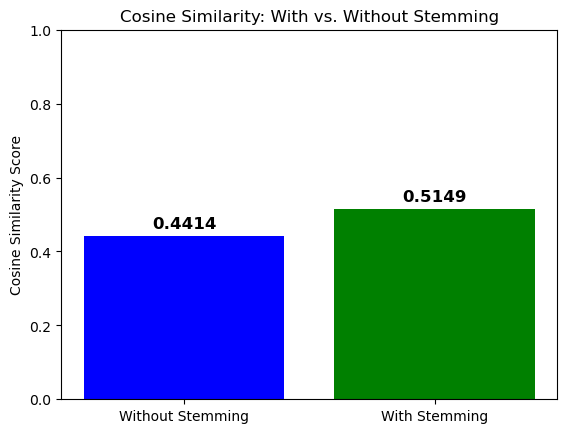

In [109]:
import matplotlib.pyplot as plt

# Ensure cosine_sim1 and cosine_sim2 are scalar values (floats)
cosine_sim1 = cosine_sim1[0][0]  # Extracting float from array
cosine_sim2 = cosine_sim2[0][0]  # Extracting float from array

# Plot the results
labels = ["Without Stemming", "With Stemming"]
values = [cosine_sim1, cosine_sim2]

plt.bar(labels, values, color=['blue', 'green'])
plt.ylim(0, 1)  # Cosine similarity is between 0 and 1
plt.ylabel("Cosine Similarity Score")
plt.title("Cosine Similarity: With vs. Without Stemming")

# Display the score on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12, fontweight='bold')

plt.show()
